In [1]:
import casadi as ca
import sys
sys.path.insert(0, '../python/pyecca')

import matplotlib.pyplot as plt
from pyecca.util import rk4
import numpy as np

from casadi.tools.graph import dotgraph
from IPython.display import Image

def draw_graph(expr):
    return Image(dotgraph(expr).create_png())


In [46]:
def numerical(x_end, n_x):
    """
    Edit this function and setup an optimal control problem that minimizes the time
    it takes for a ball rolling a long a curve to reach the end of the path assuming it
    starts at a height of 1 m and ends at a height of 0 m and the length of the path is
    x_end m.
    """
    x = np.linspace(0, x_end, n_x)  # x position where path changes
    dx = x[1] - x[0]  # path steps width
    n_dy = n_x - 1  # number of height changes we need to find
    dy0 = -(1/n_dy)*np.ones(n_dy)  # initial guess for height change along path
    
    dy_opt = dy0 # TODO, find optimal change in y along path
    y0 = ca.vertcat(1, 1 + np.cumsum(dy0))
    
    dt = ca.SX.sym('dt',n_dy)
    dy = ca.SX.sym('dy', n_dy)
    y = ca.SX.sym('y',n_x)
    v = ca.SX.sym('v',n_x)
    theta = ca.SX.sym('theta',n_dy)
    v[0] = 0
    g = 9.81
    
    for i in range(0,n_dy):
        dy[i] = y[i+1]-y[i]
        theta[i] = ca.atan2(dy[i],dx)
        
        dt[i] = (-v[i] + ca.sqrt(v[i]**2 + 2*g*dy[i]*ca.sin(theta[i])))/(g*ca.sin(theta[i]))
        v[i+1] = dt[i]*g+v[i]
    
    constrain = ca.vertcat(y[0],y[n_dy])
    
    nlp = {'x': y, 'f':ca.sum1(dt), 'g':constrain}
    S = ca.nlpsol('S', 'ipopt', nlp, {
        'print_time': 0,
        'ipopt': {
            'sb': 'yes',
            'print_level': 0,
            }
        })
    v_lb = np.zeros(n_dy)
    res = S(x0=y0, lbg=(1,0), ubg=(1,0))
    #dy_opt = np.array(res['x'])
    y_opt = np.array(res['x'])#ca.vertcat(1, 1 + np.cumsum(dy_opt))
    return x, y_opt

In [47]:
# NLP declaration to solve for boundary condition of brachistochrone
def analytical(x_end, n_x):
    c = ca.SX.sym('c')
    theta_f = ca.SX.sym('theta_f')
    xf = c*(theta_f - np.sin(theta_f))
    yf = 1 - c*(1 - np.cos(theta_f))

    nlp = {'x':ca.vertcat(c, theta_f), 'f':0, 'g':ca.vertcat(xf-x_end,yf)}
    S = ca.nlpsol('S', 'ipopt', nlp, {
        'print_time': 0,
        'ipopt': {
            'sb': 'yes',
            'print_level': 0,
            }
        })
    res = S(x0=(1, np.pi), lbg=(0, 0), ubg=(0, 0))
    C_opt = float(res['x'][0])
    theta_f_opt = float(res['x'][1])
    theta = np.linspace(0, theta_f_opt, n_x)
    xa = C_opt*(theta - np.sin(theta))
    ya = 1 - C_opt*(1 - np.cos(theta))
    return xa, ya

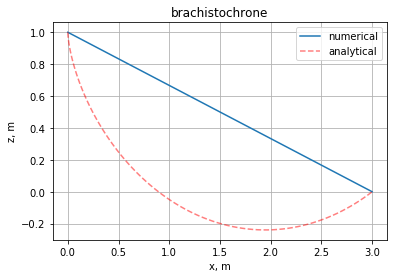

In [48]:
n_x = 101  # number of points for approximation of path
x_end = 3  # final x position when height is zero

# analytical solution
xa, ya = analytical(x_end=x_end, n_x=n_x)

# numerical solution
x, y_opt = numerical(x_end=x_end, n_x=n_x)

# plot
plt.title('brachistochrone')
plt.plot(x, y_opt, label='numerical')
plt.plot(xa, ya, 'r--', label='analytical', alpha=0.5)
plt.grid(True)
plt.xlabel('x, m')
plt.ylabel('z, m')
plt.legend()

In [32]:
y_opt

array([[1.00000000e+00],
       [9.96877573e-01],
       [9.88763787e-01],
       [9.79721471e-01],
       [9.70290050e-01],
       [9.60648645e-01],
       [9.50876930e-01],
       [9.41016853e-01],
       [9.31093082e-01],
       [9.21121299e-01],
       [9.11112071e-01],
       [9.01072844e-01],
       [8.91009061e-01],
       [8.80924814e-01],
       [8.70823256e-01],
       [8.60706868e-01],
       [8.50577637e-01],
       [8.40437176e-01],
       [8.30286813e-01],
       [8.20127658e-01],
       [8.09960641e-01],
       [7.99786555e-01],
       [7.89606078e-01],
       [7.79419795e-01],
       [7.69228217e-01],
       [7.59031788e-01],
       [7.48830899e-01],
       [7.38625896e-01],
       [7.28417087e-01],
       [7.18204746e-01],
       [7.07989119e-01],
       [6.97770426e-01],
       [6.87548868e-01],
       [6.77324625e-01],
       [6.67097861e-01],
       [6.56868726e-01],
       [6.46637357e-01],
       [6.36403878e-01],
       [6.26168405e-01],
       [6.15931044e-01],
